In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install osmnx
!pip install osmnx geopandas pandas matplotlib


Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 35.0 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


In [3]:
import matplotlib.pyplot as plt
import osmnx as ox

city_name = "Porto, Portugal"
road_network = ox.graph_from_place(city_name, network_type='drive')


In [4]:
#import pandas as pd
import ast
import pandas as pd

def parse_gps_points(data):
    expanded_data = []
    for index, row in data.iterrows():
        trip_id = row['TRIP_ID']
        polyline = row['POLYLINE']

        if polyline and isinstance(polyline, str):
            try:
                # Convert the POLYLINE string to a list of coordinates
                coordinates = ast.literal_eval(polyline)

                # Only add if there are valid coordinates
                if coordinates:
                    for lon, lat in coordinates:
                        expanded_data.append({'TRIP_ID': trip_id, 'lon': lon, 'lat': lat})
                else:
                    print(f"Empty POLYLINE for trip {trip_id} at index {index}")

            except (ValueError, SyntaxError) as e:
                print(f"Failed to parse POLYLINE for trip {trip_id} at index {index}: {e}")

    return pd.DataFrame(expanded_data)
# Define the path to the zip file in Google Drive
file_path = '/content/drive/MyDrive/train_1497.csv'


# Example for loading the first 1500 trips from train.csv
train_1497 = pd.read_csv(file_path)
# Load the original dataset and parse
gps_data = parse_gps_points(train_1497)
gps_data.to_csv('gps_data_1497.csv', index=False)

# Check if data is now populated
print(gps_data.head(10))


               TRIP_ID       lon        lat
0  1372636858620000589 -8.618643  41.141412
1  1372636858620000589 -8.618499  41.141376
2  1372636858620000589 -8.620326  41.142510
3  1372636858620000589 -8.622153  41.143815
4  1372636858620000589 -8.623953  41.144373
5  1372636858620000589 -8.626680  41.144778
6  1372636858620000589 -8.627373  41.144697
7  1372636858620000589 -8.630226  41.145210
8  1372636858620000589 -8.632746  41.146920
9  1372636858620000589 -8.631738  41.148225


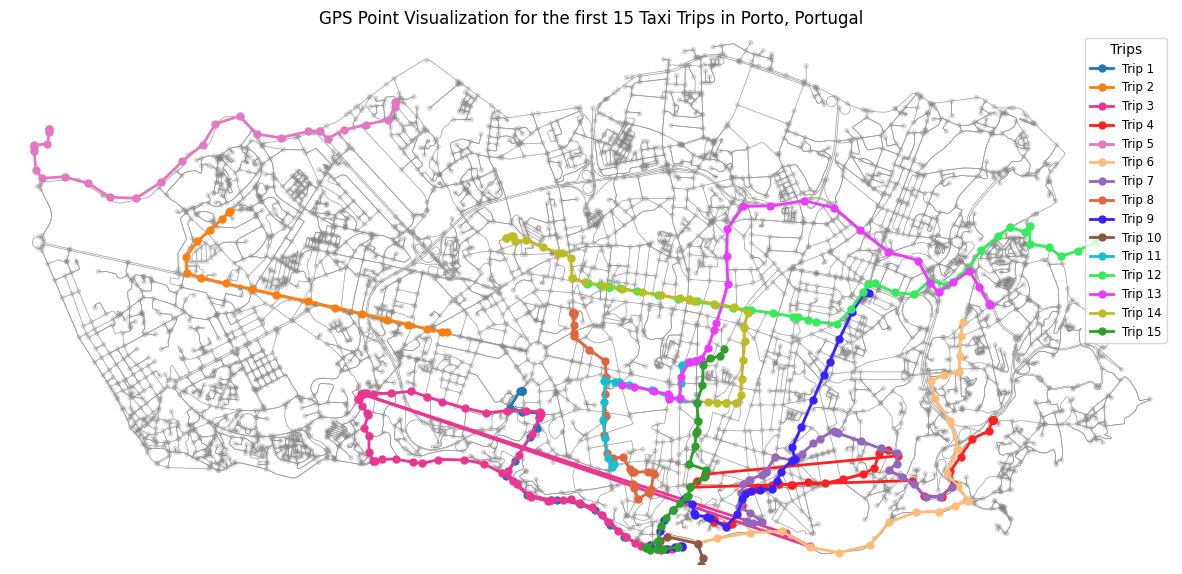

In [5]:
import matplotlib.pyplot as plt
import osmnx as ox

def enhanced_plot_gps_points(gps_data, road_network):
    fig, ax = plt.subplots(figsize=(15, 15))

    # Plot the road network with a cleaner background
    ox.plot_graph(
        road_network, ax=ax, bgcolor='white',
        node_color='gray', node_alpha=0.3, edge_linewidth=0.5,
        show=False, close=False
    )

    # Get unique TRIP_IDs and select the first 15 trips
    unique_trips = gps_data['TRIP_ID'].unique()[:15]

    # Define a custom color list with 15 distinct colors
    custom_colors = [
        '#1f77b4', '#ff7f0e', '#ea3690', '#FF2121', '#e377c2',
        '#ffbb78', '#9467bd', '#e2653e', '#3621FF', '#8c564b',
        '#17becf', '#34ec5B', '#EC3BFF', '#bcbd22', '#2ca02c'
    ]

    for i, trip_id in enumerate(unique_trips):
        trip = gps_data[gps_data['TRIP_ID'] == trip_id]

        # Select color from custom color list
        color = custom_colors[i % len(custom_colors)]

        # Plot each trip with its specific color
        ax.plot(
            trip['lon'], trip['lat'],
            marker='o', linestyle='-', linewidth=2,
            markersize=5, color=color, label=f'Trip {i+1}'
        )

    # Add a legend to differentiate trips
    plt.legend(title="Trips", loc='upper right', fontsize='small')
    plt.title("GPS Point Visualization for the first 15 Taxi Trips in Porto, Portugal")
    plt.show()

# Run the enhanced plot function
enhanced_plot_gps_points(gps_data, road_network)


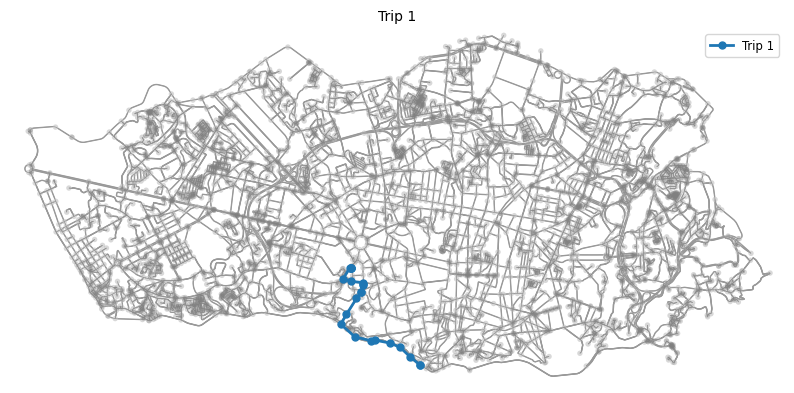

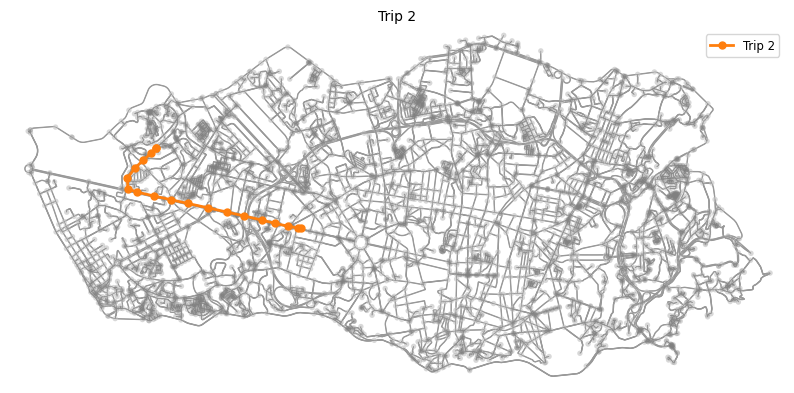

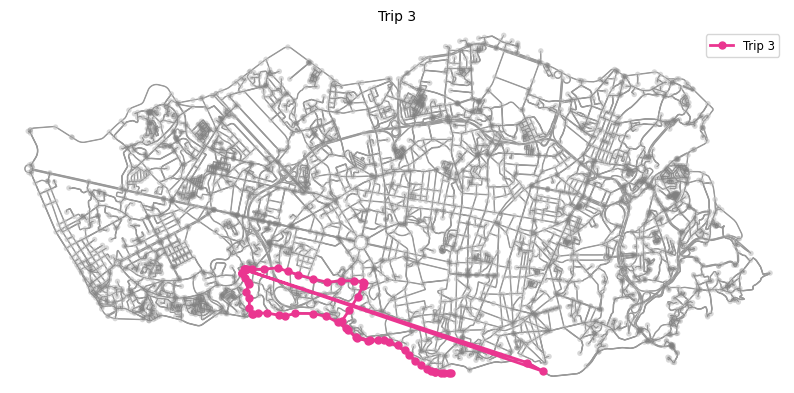

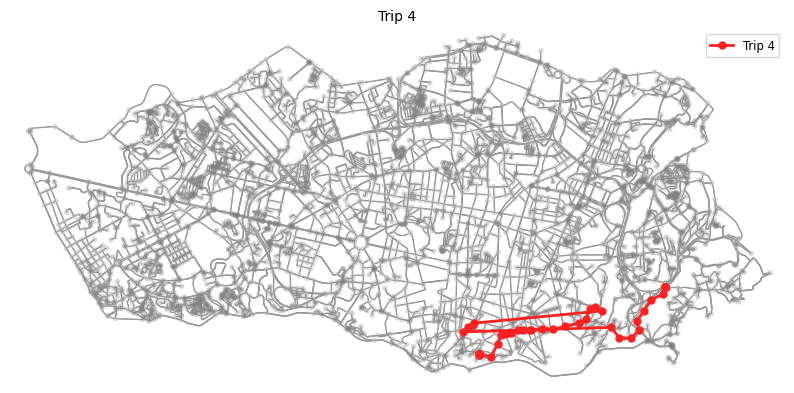

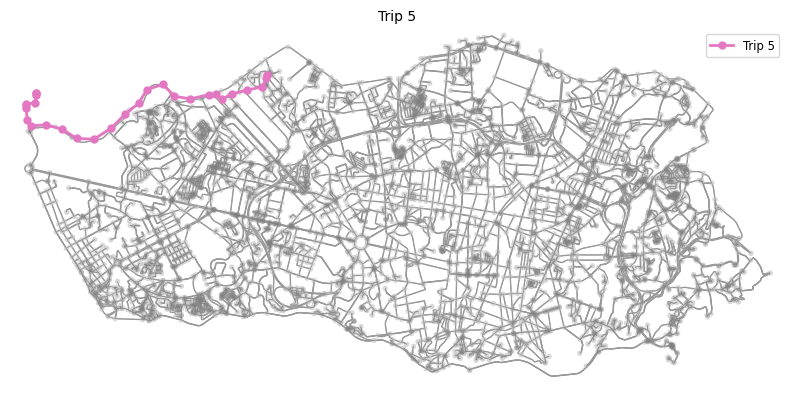

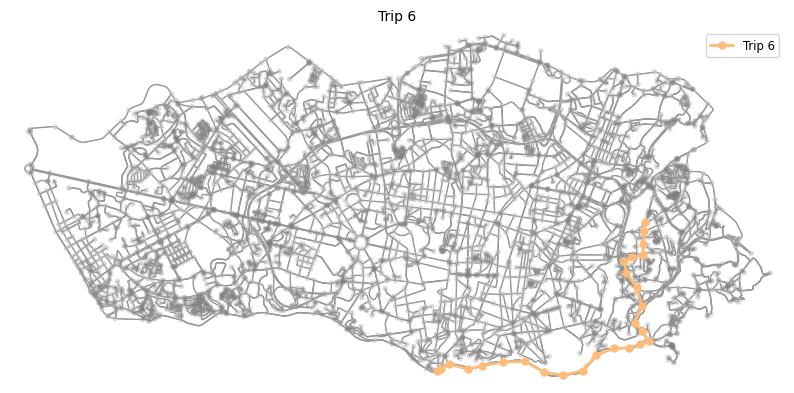

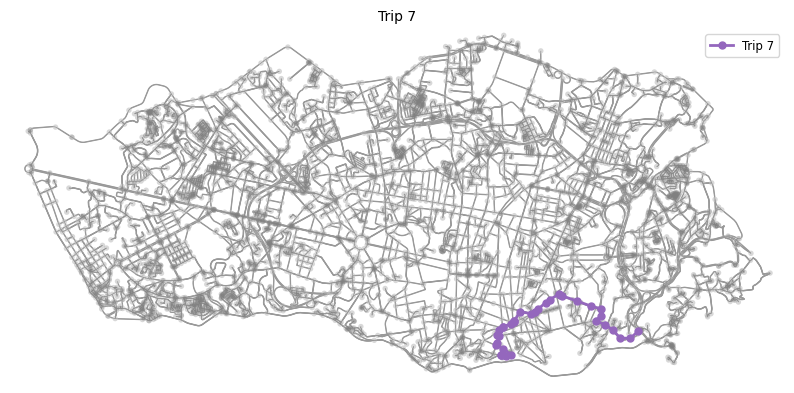

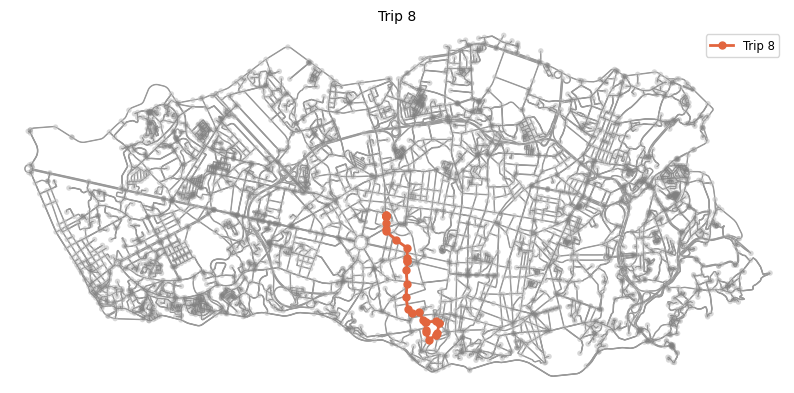

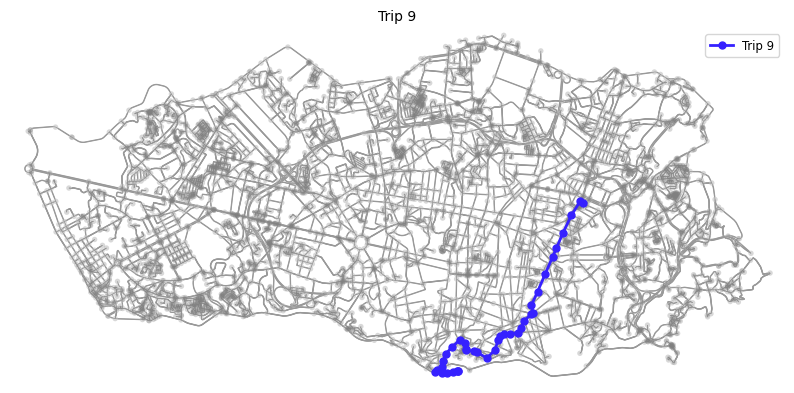

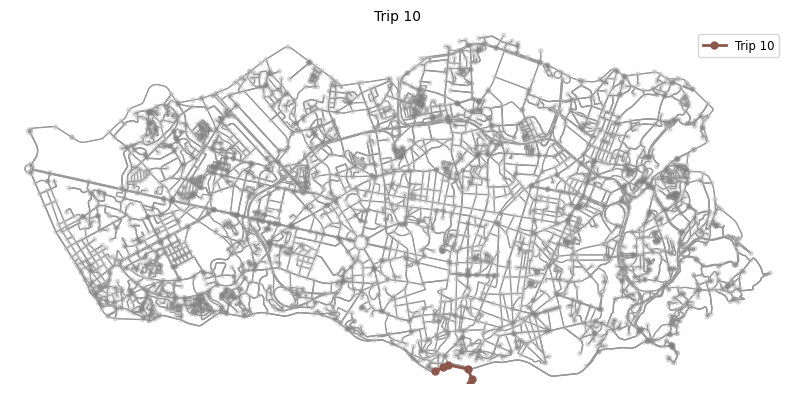

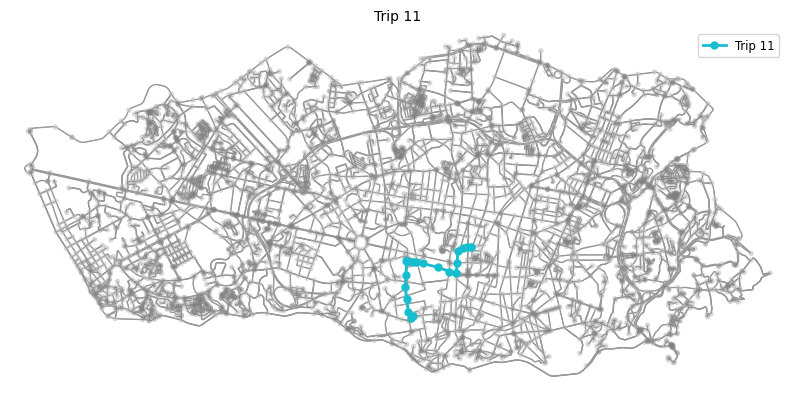

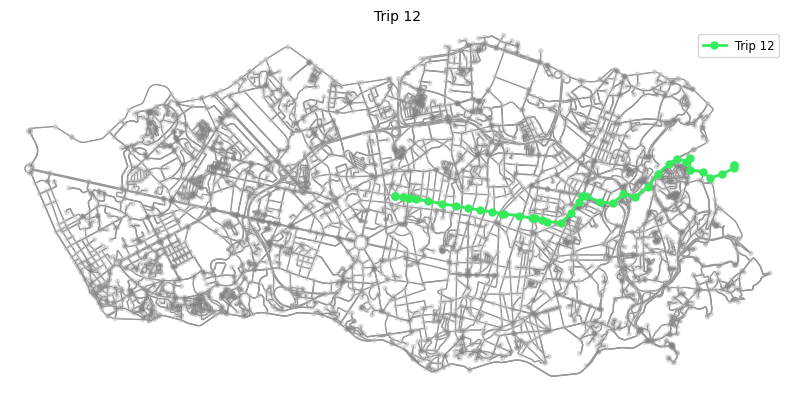

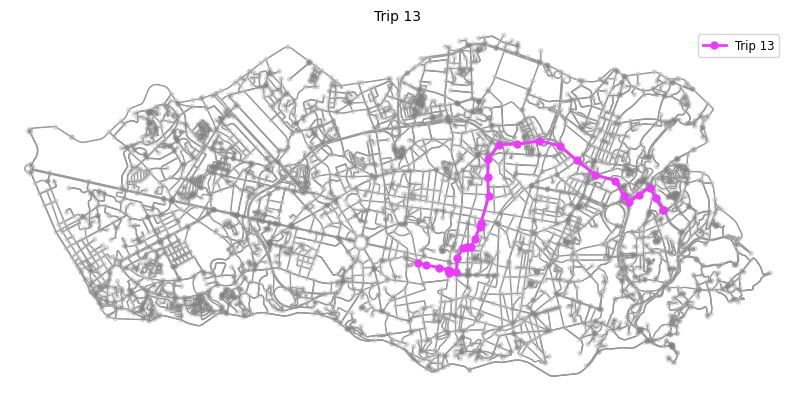

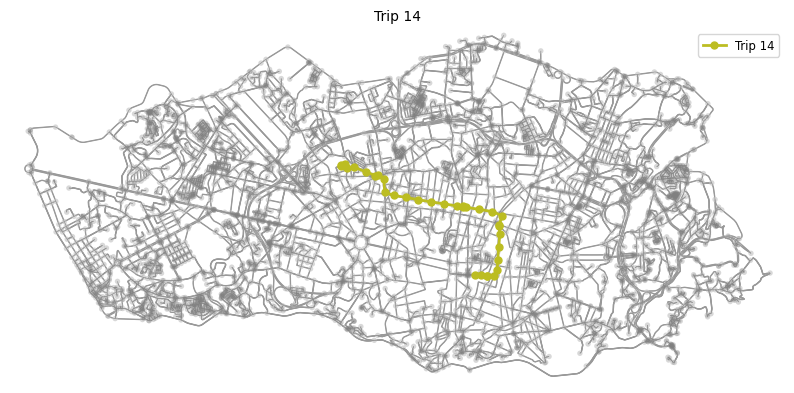

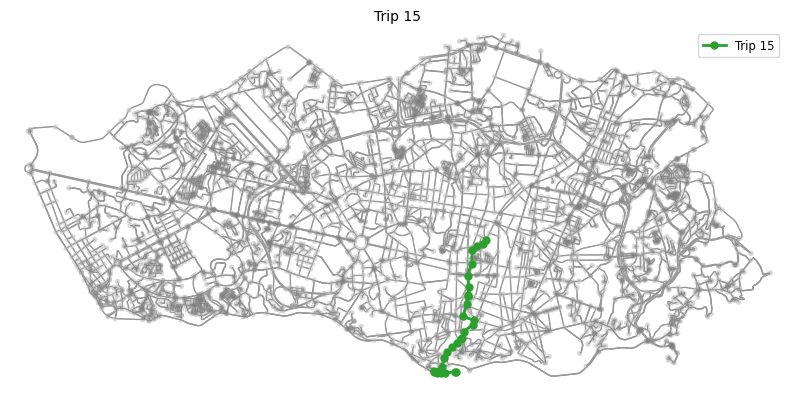

In [7]:
import matplotlib.pyplot as plt
import osmnx as ox

def enhanced_plot_gps_points(gps_data, road_network):
    # Define a custom color list with 15 distinct colors
    custom_colors = [
        '#1f77b4', '#ff7f0e', '#ea3690', '#FF2121', '#e377c2',
        '#ffbb78', '#9467bd', '#e2653e', '#3621FF', '#8c564b',
        '#17becf', '#34ec5B', '#EC3BFF', '#bcbd22', '#2ca02c'
    ]

    # Get unique TRIP_IDs and select the first 15 trips
    unique_trips = gps_data['TRIP_ID'].unique()[:15]


    for i, trip_id in enumerate(unique_trips[:15]):
        fig, ax = plt.subplots(figsize=(10, 10))
        ox.plot_graph(road_network, ax=ax, show=False, close=False)

        trip = gps_data[gps_data['TRIP_ID'] == trip_id]

        # Select color from custom color list
        color = custom_colors[i % len(custom_colors)]

        # Plot the road network with a cleaner background in each subplot
        ox.plot_graph(
            road_network, ax=ax, bgcolor='white',
            node_color='gray', node_alpha=0.3, edge_linewidth=0.5,
            show=False, close=False
        )

        # Plot each trip with its specific color in each subplot
        ax.plot(
            trip['lon'], trip['lat'],
            marker='o', linestyle='-', linewidth=2,
            markersize=5, color=color, label=f'Trip {i+1}'
        )

        # Add titles and legend to each subplot
        ax.set_title(f'Trip {i+1}', fontsize=10)
        ax.legend(loc='upper right', fontsize='small')

    # Adjust layout to prevent overlap

    plt.show()

# Run the enhanced plot function
enhanced_plot_gps_points(gps_data, road_network)


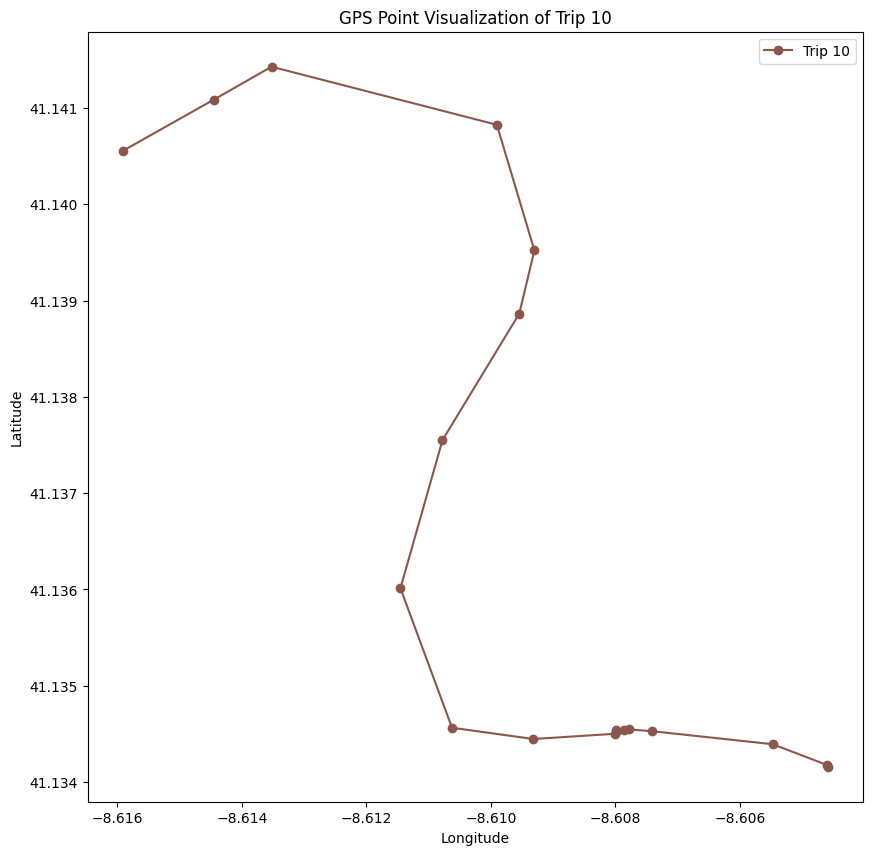

In [8]:
import matplotlib.pyplot as plt

def plot_trip_gps_points(gps_data, trip_id, color='#8c564b'):
    # Filter the data for the specific TRIP_ID
    trip_data = gps_data[gps_data['TRIP_ID'] == trip_id]

    if trip_data.empty:
        print(f"No data found for Trip 10")
        return

    # Create a plot with longitude on the x-axis and latitude on the y-axis
    plt.figure(figsize=(10, 10))
    plt.plot(trip_data['lon'], trip_data['lat'], marker='o', linestyle='-', color=color, label=f'Trip 10')

    # Add labels and title
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'GPS Point Visualization of Trip 10')
    plt.legend()

    # Show the plot
    plt.show()

# Choose the TRIP_ID you want to plot (in this case, Trip 10)
trip_id_to_plot = 1372637905620000320  # Replace this with the actual TRIP_ID of Trip 10

# Visualize the GPS points for the chosen trip with the color #8c564b
plot_trip_gps_points(gps_data, trip_id_to_plot, color='#8c564b')
